<img src="img/autoslocos.jpeg">

In [4]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
#import utils
import cv2

In [6]:
image ='img/autoslocos.jpeg'
#image='img/Joker.jpeg'
clusters = 3

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image.shape

(1196, 932, 3)

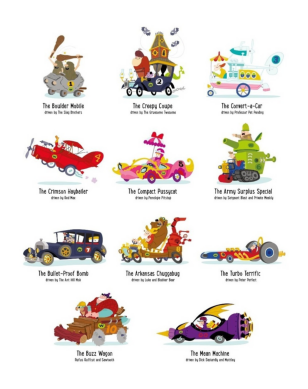

In [8]:
plt.figure()
plt.axis("off")
plt.imshow(image);

In [13]:
import numpy as np

def only_murders_in_the_building(imagen):
    data_points = [] # coordinate,pixel_value
    for x1 in range(imagen.shape[1]):
        for x2 in range(imagen.shape[0]):
            if sum(imagen[x2,x1]) < 240*3:
                data_points.append([x1,imagen.shape[0]-x2])
    return np.array(data_points)


In [14]:
X = only_murders_in_the_building(image)

In [17]:
def plot_clusters(X,y=None):
    plt.scatter(X[:, 0],  X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

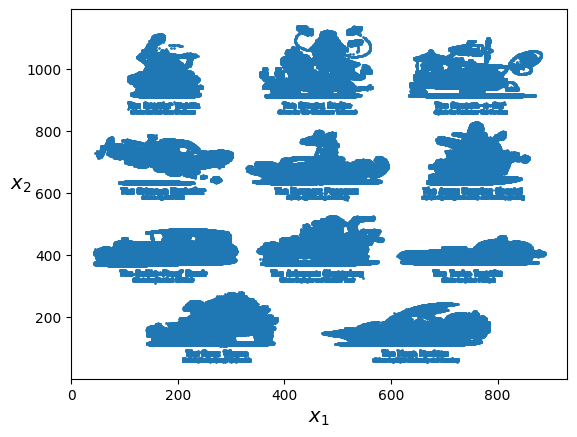

In [18]:
plot_clusters(X)

In [22]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters = 11)

In [27]:
model.fit(X)

C:\Users\glezr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11)

In [30]:
X.shape

(245009, 2)

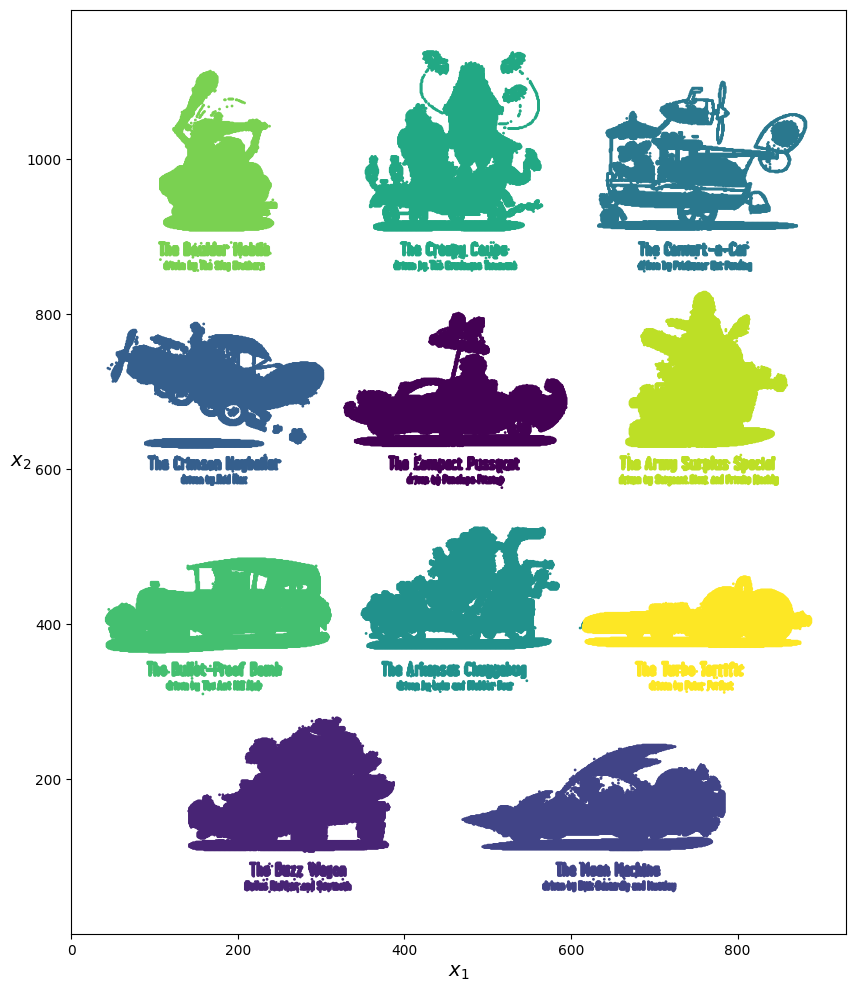

In [29]:
plt.figure(figsize=(10, 12))
plot_clusters(X, y = model.predict(X)) # y realmente es el color, no el eje y
#save_fig("blobs_plot")
plt.show()


In [31]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

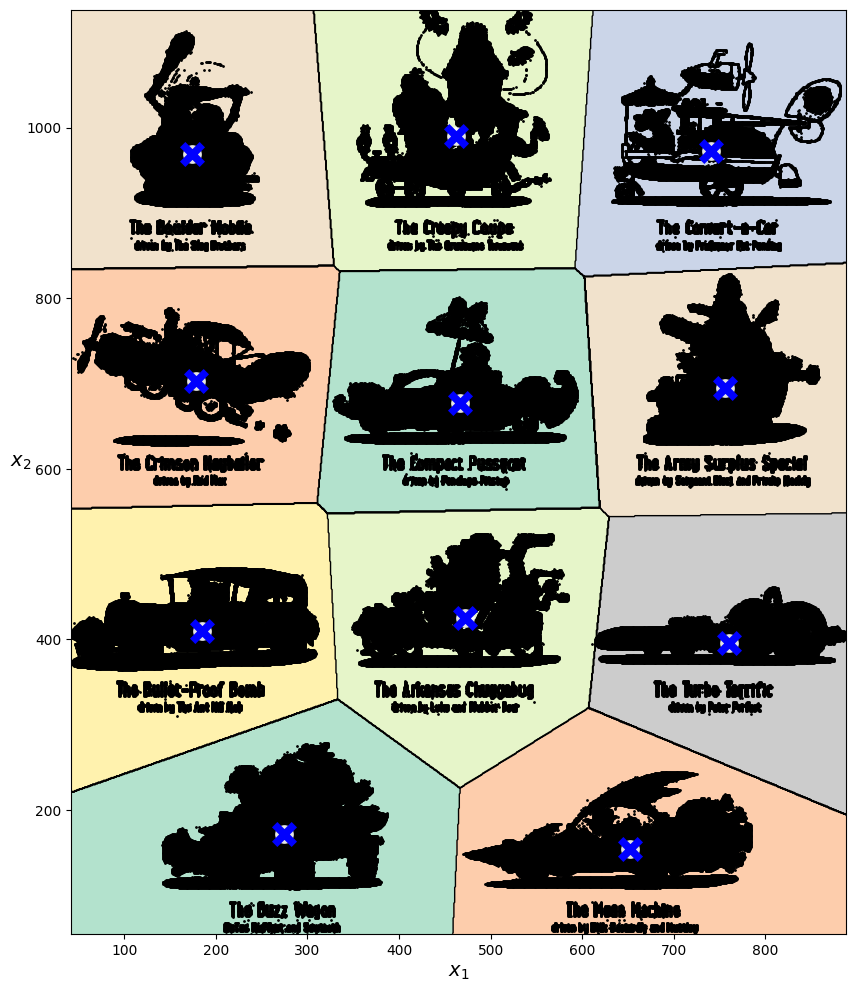

In [33]:
plt.figure(figsize=(10, 12))
plot_decision_boundaries(model, X)
#save_fig("voronoi_plot")
plt.show()


In [41]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=10)

In [42]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

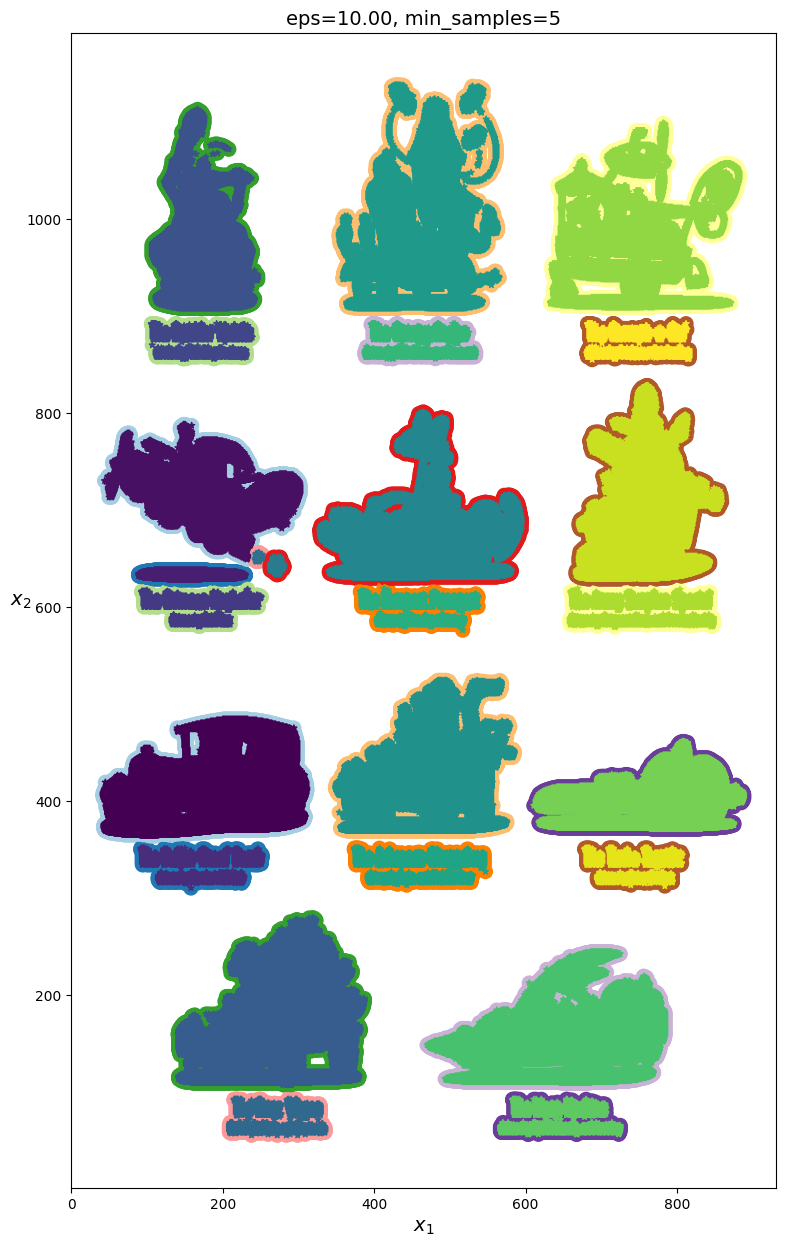

In [43]:
plt.figure(figsize=(20, 15))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.show()
